In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
data = pd.read_csv("/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv")
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
140794,United States of America,Renton,55,Moderate,1,Good,28,Good,9,Good,55,Moderate
140795,India,Rewari,177,Unhealthy,3,Good,154,Unhealthy,1,Good,177,Unhealthy
140796,Brazil,Rio Negrinho,38,Good,0,Good,15,Good,2,Good,38,Good
140797,France,Riom,53,Moderate,1,Good,33,Good,1,Good,53,Moderate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140799 entries, 0 to 140798
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country             138192 non-null  object
 1   City                137332 non-null  object
 2   AQI Value           140799 non-null  int64 
 3   AQI Category        140799 non-null  object
 4   CO AQI Value        140799 non-null  int64 
 5   CO AQI Category     140799 non-null  object
 6   Ozone AQI Value     140799 non-null  int64 
 7   Ozone AQI Category  140799 non-null  object
 8   NO2 AQI Value       140799 non-null  int64 
 9   NO2 AQI Category    140799 non-null  object
 10  PM2.5 AQI Value     140799 non-null  int64 
 11  PM2.5 AQI Category  140799 non-null  object
dtypes: int64(5), object(7)
memory usage: 12.9+ MB


In [6]:
data.isna().sum()

Country               2607
City                  3467
AQI Value                0
AQI Category             0
CO AQI Value             0
CO AQI Category          0
Ozone AQI Value          0
Ozone AQI Category       0
NO2 AQI Value            0
NO2 AQI Category         0
PM2.5 AQI Value          0
PM2.5 AQI Category       0
dtype: int64

In [7]:
data.isna().sum()

Country               2607
City                  3467
AQI Value                0
AQI Category             0
CO AQI Value             0
CO AQI Category          0
Ozone AQI Value          0
Ozone AQI Category       0
NO2 AQI Value            0
NO2 AQI Category         0
PM2.5 AQI Value          0
PM2.5 AQI Category       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140799 entries, 0 to 140798
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country             138192 non-null  object
 1   City                137332 non-null  object
 2   AQI Value           140799 non-null  int64 
 3   AQI Category        140799 non-null  object
 4   CO AQI Value        140799 non-null  int64 
 5   CO AQI Category     140799 non-null  object
 6   Ozone AQI Value     140799 non-null  int64 
 7   Ozone AQI Category  140799 non-null  object
 8   NO2 AQI Value       140799 non-null  int64 
 9   NO2 AQI Category    140799 non-null  object
 10  PM2.5 AQI Value     140799 non-null  int64 
 11  PM2.5 AQI Category  140799 non-null  object
dtypes: int64(5), object(7)
memory usage: 12.9+ MB


In [9]:
np.arange(0,12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
data = data.iloc[:,[3,  5,  7,  9, 2,  4,  6,  8,  10, 11]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140799 entries, 0 to 140798
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AQI Category        140799 non-null  object
 1   CO AQI Category     140799 non-null  object
 2   Ozone AQI Category  140799 non-null  object
 3   NO2 AQI Category    140799 non-null  object
 4   AQI Value           140799 non-null  int64 
 5   CO AQI Value        140799 non-null  int64 
 6   Ozone AQI Value     140799 non-null  int64 
 7   NO2 AQI Value       140799 non-null  int64 
 8   PM2.5 AQI Value     140799 non-null  int64 
 9   PM2.5 AQI Category  140799 non-null  object
dtypes: int64(5), object(5)
memory usage: 10.7+ MB


In [11]:
def unique(i):
    print("For {}".format(i))
    print(data[i].unique())
    print("-------------------------------")
    
for i in data.columns:
    unique(i)

For AQI Category
['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
-------------------------------
For CO AQI Category
['Good' 'Unhealthy for Sensitive Groups' 'Moderate' 'Unhealthy'
 'Very Unhealthy']
-------------------------------
For Ozone AQI Category
['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy']
-------------------------------
For NO2 AQI Category
['Good' 'Moderate' 'Unhealthy for Sensitive Groups']
-------------------------------
For AQI Value
[ 51  41  66  34  22  54  62  64 142  68 158  83  59 154  55  72 161  28
 118  33 150  81  67  31  56  77  44  30  79  61  32  29 247  45  36 124
 157  60 153  47  37  58  89  52  38  88  42 189  49 203  35  90  48  19
  73 170 155  46 172  21 166  27  23 168  40 133  50  25  65  53  57 167
  80 163 126  63  86  78 112 121 160 144  69  84  20  75  98 103 307 151
 102 115  17 127 125  92 143 187 156 105 198 139 145  13  26 107  76 104
  39  97 194  70 500 380 

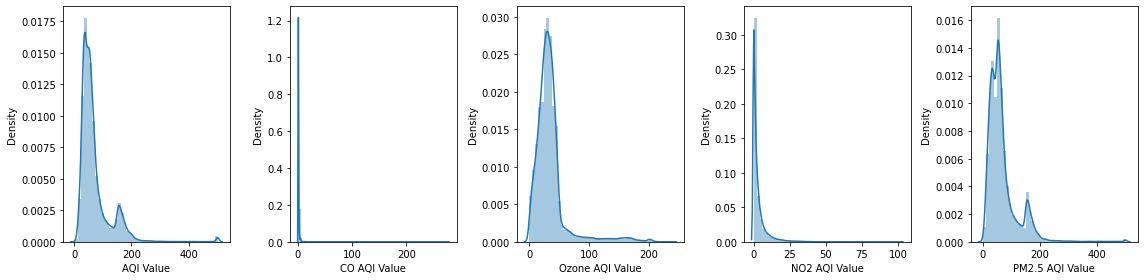

In [12]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.iloc[:,4:-1].columns):

    plt.subplot(1,5,i+1)

    sns.distplot(data[j])
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

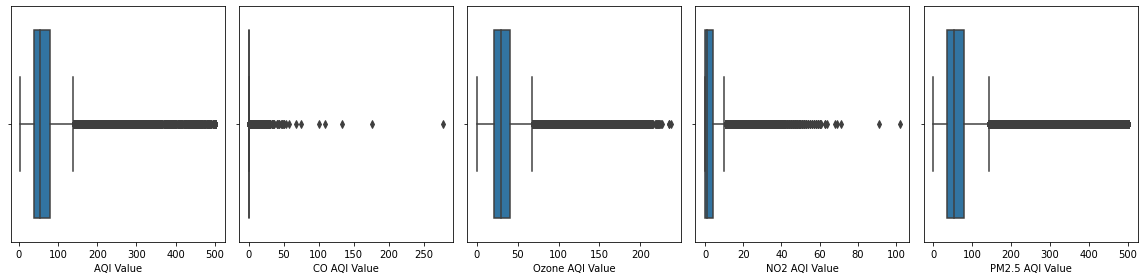

In [13]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.iloc[:,4:-1].columns):

    plt.subplot(1,5,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

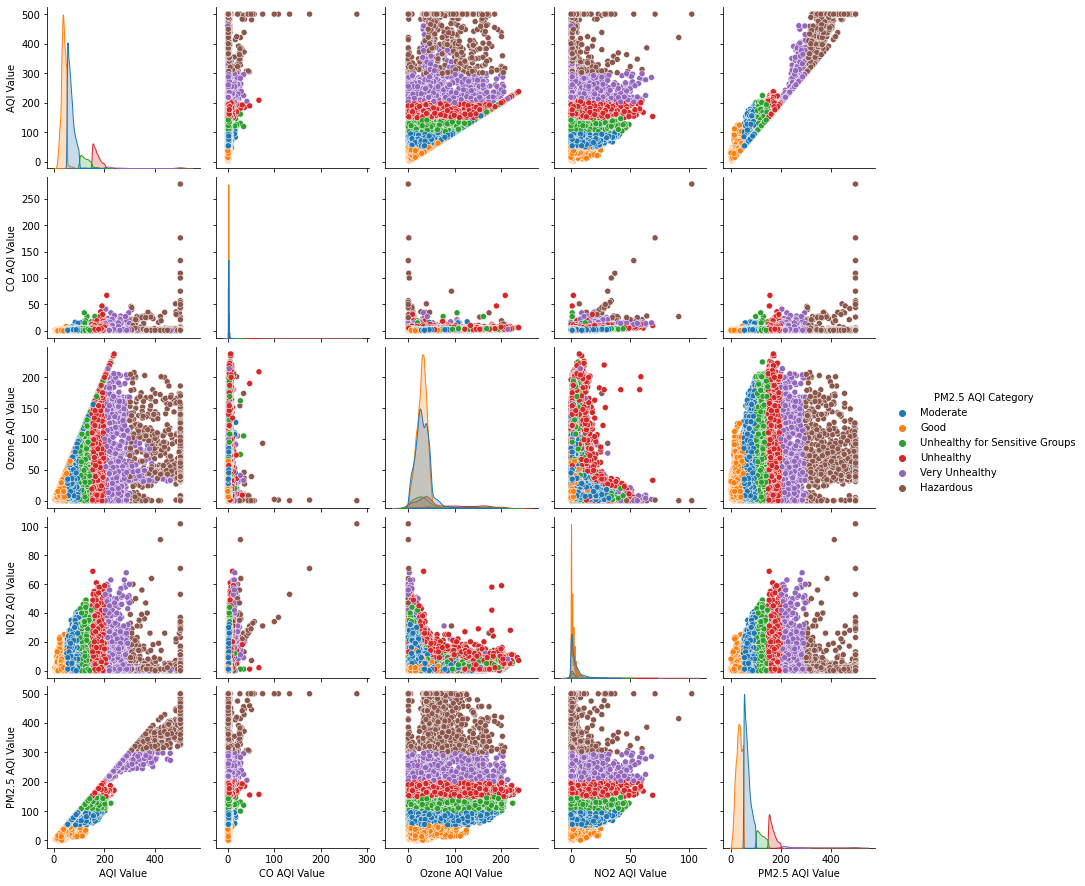

In [14]:
sns.pairplot(data.iloc[:,4:], hue = "PM2.5 AQI Category")
plt.show()

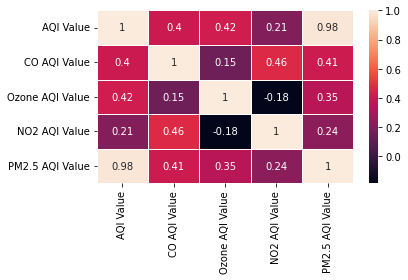

In [15]:
sns.heatmap(data.iloc[:,4:-1].corr(), annot = True, linewidths = 1)
plt.tight_layout()
plt.show()

In [16]:
def label(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.iloc[:,:4].columns:
    label(i)

data

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,2,0,0,0,51,1,36,0,51,Moderate
1,0,0,0,0,41,1,5,1,41,Good
2,2,0,0,0,66,1,39,2,66,Moderate
3,0,0,0,0,34,1,34,0,20,Good
4,0,0,0,0,22,0,22,0,6,Good
...,...,...,...,...,...,...,...,...,...,...
140794,2,0,0,0,55,1,28,9,55,Moderate
140795,3,0,2,0,177,3,154,1,177,Unhealthy
140796,0,0,0,0,38,0,15,2,38,Good
140797,2,0,0,0,53,1,33,1,53,Moderate


In [17]:
col = list(data.columns)

predictor = col[:-1]

display(predictor)

target = col[-1]
display(target)

['AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

'PM2.5 AQI Category'

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data[target])

display(train)
display(test)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
18397,0,0,0,0,24,0,12,1,24,Good
115897,0,0,0,0,49,1,15,8,49,Good
21736,0,0,0,0,45,1,15,0,45,Good
112486,0,0,0,0,38,0,23,0,38,Good
78205,2,0,0,0,75,1,15,0,75,Moderate
...,...,...,...,...,...,...,...,...,...,...
136622,2,0,0,0,77,2,6,7,77,Moderate
122549,2,0,0,0,59,1,48,1,59,Moderate
92169,0,0,0,0,26,0,13,0,26,Good
87774,0,0,0,0,30,1,30,0,20,Good


,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
121722,0,0,0,0,26,0,13,0,26,Good
122867,0,0,0,0,46,1,46,1,34,Good
93400,2,0,0,0,64,1,17,12,64,Moderate
92046,2,0,0,0,98,0,28,0,98,Moderate
22083,0,0,0,0,45,1,40,0,45,Good
...,...,...,...,...,...,...,...,...,...,...
138451,0,0,0,0,26,1,26,0,16,Good
109826,0,0,0,0,34,1,34,0,30,Good
82951,2,0,0,0,66,1,42,0,66,Moderate
134628,0,0,0,0,24,0,13,1,24,Good


In [19]:
model = DecisionTreeClassifier(random_state = 0)

model.fit(train[predictor], train[target])

print("For Test Data")
test_pred = model.predict(test[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
display(accuracy_score(test_pred, test[target]))

print()
print("For Train Data")
train_pred = model.predict(train[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print(accuracy_score(train_pred, train[target]))

For Test Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,12308,0,0,0,0,0
Hazardous,0,201,0,0,0,0
Moderate,0,0,10871,0,0,0
Unhealthy,0,0,0,2497,0,0
Unhealthy for Sensitive Groups,0,0,0,0,1971,0
Very Unhealthy,0,0,0,0,0,312


1.0


For Train Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,49231,0,0,0,0,0
Hazardous,0,807,0,0,0,0
Moderate,0,0,43484,0,0,0
Unhealthy,0,0,0,9987,0,0
Unhealthy for Sensitive Groups,0,0,0,0,7884,0
Very Unhealthy,0,0,0,0,0,1246


1.0


## RandomizedSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param = {"criterion":["gini", "entropy", "log_loss"], 
            "splitter":["best", "random"], 
            "max_depth":list(range(1,50)), 
            "min_samples_split":list(range(2,50)), 
            "min_samples_leaf":list(range(1,50)), 
            "max_features":["auto", "sqrt", "log2"], 
            "max_leaf_nodes":list(range(1,50))}

In [21]:
model = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                            param_distributions = param,
                            scoring = "accuracy",
                            n_jobs = -1,
                            random_state = 0,
                            cv = 5).fit(train[predictor], train[target])

model

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 1

In [22]:
model.best_params_

{'splitter': 'best',
 'min_samples_split': 27,
 'min_samples_leaf': 46,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [23]:
model.best_score_

0.9917346237072332

In [24]:
model = model.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=40, min_samples_leaf=46,
                       min_samples_split=27, random_state=0)

In [25]:
print("For Test Data")
test_pred = model.predict(test[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
display(accuracy_score(test_pred, test[target]))

print()
print("For Train Data")
train_pred = model.predict(train[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print(accuracy_score(train_pred, train[target]))

For Test Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,12188,0,120,0,0,0
Hazardous,0,146,0,54,0,1
Moderate,92,0,10779,0,0,0
Unhealthy,0,0,0,2493,3,1
Unhealthy for Sensitive Groups,0,0,0,0,1971,0
Very Unhealthy,0,16,0,16,3,277


0.9891335227272727


For Train Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,48758,0,473,0,0,0
Hazardous,0,556,0,238,0,13
Moderate,434,0,43050,0,0,0
Unhealthy,0,0,0,9974,13,0
Unhealthy for Sensitive Groups,0,0,0,0,7884,0
Very Unhealthy,0,40,0,43,4,1159


0.9888315769848809


## Train Accuracy  : 98%
## Test Accuracy   : 98%

## Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = model,random_state = 0)
model.fit(train[predictor], train[target])

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=10,
                                                        max_features='auto',
                                                        max_leaf_nodes=40,
                                                        min_samples_leaf=46,
                                                        min_samples_split=27,
                                                        random_state=0),
                  random_state=0)